In [1]:
!pip install keras --upgrade

In [13]:
!pip install opendatasets
!pip install pandas

In [20]:
pip install --upgrade tensorflow


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 524.1/524.1 MB 2.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 92.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 440.8/440.8 kB 40.5 MB/s eta 0:00:00
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.7.1
    Uninstalling typing_extensions-4.7.1:
      Successfully uninstalled typing_extensions-4.7.1
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.12.0
    Uninstalling tensorflow-estimator-2.12.0:
      Successfully uninstalled tensorflow-estimator-2.12.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.12.3
    Uninstalling tensorboard-2.12.3:
      Successfully uninstalled tensorboard-2.12.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.12.0
    Uninstalling tensorflow-2.12.0:
      Successfully uninstalled tensorflow-2.12.0
ERROR:

In [6]:
import opendatasets as od
import pandas

od.download(
    "https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset")

Skipping, found downloaded files in "./new-plant-diseases-dataset" (use force=True to force download)


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

import keras
from tensorflow.keras.utils import img_to_array, load_img


from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19,preprocess_input,decode_predictions

In [7]:
len(os.listdir('/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train'))

38

In [8]:
train_datagen = ImageDataGenerator(zoom_range=0.5,shear_range=0.3,horizontal_flip=True,preprocessing_function=preprocess_input)
val_datagen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [9]:
train = train_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train",
                                          target_size=(256,256),
                                         batch_size=32)
val = val_datagen.flow_from_directory(directory="/content/new-plant-diseases-dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid",
                                          target_size=(256,256),
                                         batch_size=32)

Found 70295 images belonging to 38 classes.
Found 17572 images belonging to 38 classes.


In [10]:
t_img,label =train.next()


In [11]:
t_img.shape

(32, 256, 256, 3)

In [12]:
def plotImage(img_arr,label):
  for im,l in zip(img_arr,label):
    plt.figure(figsize=(5,5))
    plt.imshow(im)
    plt.show()

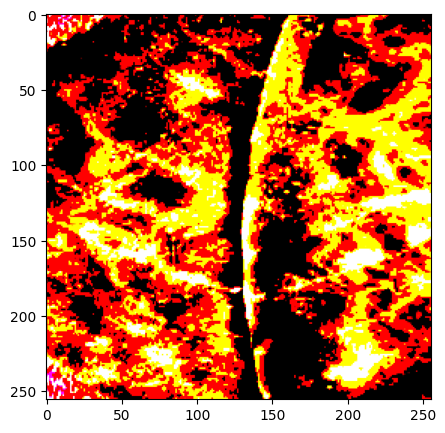

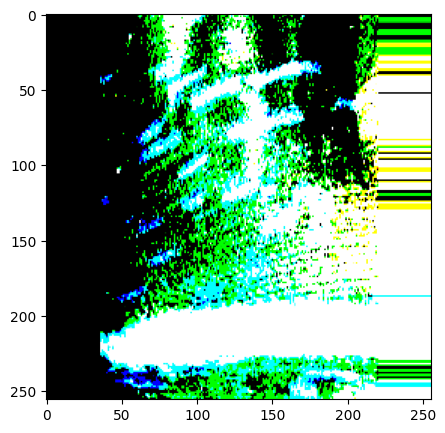

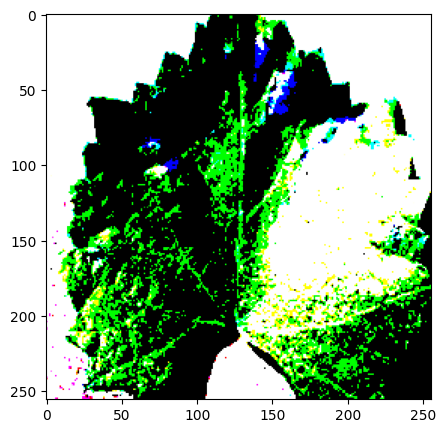

In [13]:
plotImage(t_img[:3],label[:3])

In [14]:
from keras.layers import Dense,Flatten
from keras.models import Model


In [15]:
base_model = VGG19(input_shape=(256,256,3),include_top=False)

80134624/80134624 [==============================] - 4s 0us/step


In [16]:
for layer in base_model.layers:
  layer.trainable = False

In [17]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [18]:
X = Flatten()(base_model.output)

X =Dense(units =38, activation='softmax')(X)

model =Model(base_model.input,X)

In [19]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 256, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 256, 256, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 256, 256, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 128, 128, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 128, 128, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 128, 128, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 64, 64, 128)       0     

In [20]:
model.compile(optimizer='adam',loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])

In [21]:
from keras.callbacks import ModelCheckpoint, EarlyStopping

es = EarlyStopping(monitor="val_accuracy",min_delta= 0.01,patience=3,verbose=1)

mc= ModelCheckpoint(filepath="best_model.h5",monitor="val_accuracy",min_delta= 0.01,patience=3,verbose=1,save_best_only=True)

cb = [es,mc]

In [23]:
his = model.fit_generator(train, steps_per_epoch=16,epochs=2,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)

<ipython-input-23-34ffa474805d>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  his = model.fit_generator(train, steps_per_epoch=16,epochs=2,verbose=1,callbacks=cb,validation_data=val,validation_steps=16)


Epoch 1/2
16/16 [==============================] - ETA: 0s - loss: 26.1673 - accuracy: 0.2207 
Epoch 1: val_accuracy improved from -inf to 0.44922, saving model to best_model.h5


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


16/16 [==============================] - 1142s 73s/step - loss: 26.1673 - accuracy: 0.2207 - val_loss: 16.3561 - val_accuracy: 0.4492
Epoch 2/2
16/16 [==============================] - ETA: 0s - loss: 14.3070 - accuracy: 0.4434 
Epoch 2: val_accuracy improved from 0.44922 to 0.60352, saving model to best_model.h5
16/16 [==============================] - 1119s 72s/step - loss: 14.3070 - accuracy: 0.4434 - val_loss: 10.5136 - val_accuracy: 0.6035


In [24]:
h = his.history
h.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

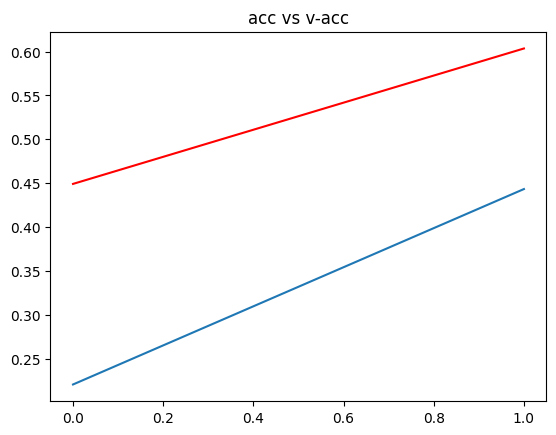

In [25]:
plt.plot(h['accuracy'])
plt.plot(h['val_accuracy'],c='red')
plt.title('acc vs v-acc')
plt.show()

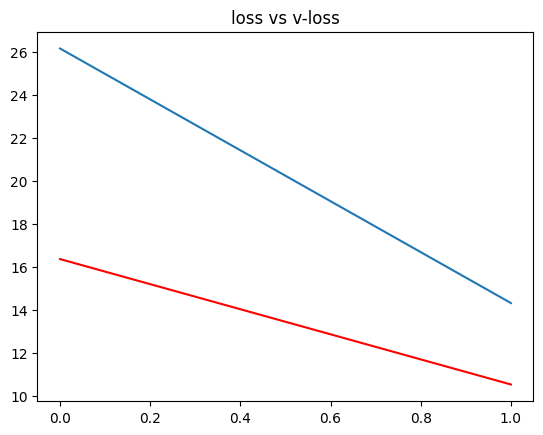

In [26]:
plt.plot(h['loss'])
plt.plot(h['val_loss'],c='red')
plt.title('loss vs v-loss')
plt.show()

In [27]:
from keras.models import load_model

model = load_model('/content/best_model.h5')

In [ ]:
accuracy= model.evaluate_generator(val)[1]

print(f'Accuracy is {accuracy*100}')

In [29]:
newlist=dict(zip(list(train.class_indices.values()),list(train.class_indices.keys())))

In [30]:
def pred(path):
  img = load_img(path,target_size=(256,256))
  i =img_to_array(img)
  im = preprocess_input(i)
  img =np.expand_dims(im,axis=0)
  pr=np.argmax(model.predict(img))
  print(f'The image is {newlist[pr]}')

In [31]:
path='/content/new-plant-diseases-dataset/test/test/Blueberry_healthy.JPG'
pred(path)

1/1 [==============================] - 3s 3s/step
The image is Blueberry___healthy
